In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

***
$\mathbf{\text{Zadanie 1}}$<br>
***
Dane są dwa sygnały o okresie podstawowym $N=4$: $s_1={2,1,3,0}$ i $s_2={0,1,3,0}$. <br>
&emsp;a) Dla każdego sygnału wyznaczyć i wykreślić widmo amplitudowe i fazowe, obliczyć moc sygnału i sprawdzić słuszność twierdzenia Parsevala.<br>
&emsp;b) Sprawdzić słuszność twierdzenia o dyskretnej transformacji Fouriera splotu kołowego sygnałów $s_1$ i $s_2$: wyznaczyć ręcznie splot kołowy sygnałów $s_1$ i $s_2$, a następnie wyznaczyć ten splot ponownie za pomocą dyskretnej transformacji Fouriera.

In [3]:
s1 = [2, 1, 3, 0]

In [4]:
s2 = [0, 1, 3, 0]

In [5]:
N = 4

$$ \text{N-punktowa DFT:  } X_N[k] = \frac{1}{N} \sum_{n=0}^{N-1}x[n]e^\frac {-j2\pi kn}{N}$$

In [6]:
s1_fft = np.fft.fft(a=s1) / N

In [7]:
s1_fft # DFT s1

array([ 1.5 +0.j  , -0.25-0.25j,  1.  +0.j  , -0.25+0.25j])

In [8]:
s2_fft = np.fft.fft(a=s2) / N

In [9]:
s2_fft # DFT s2

array([ 1.  +0.j  , -0.75-0.25j,  0.5 +0.j  , -0.75+0.25j])

$$ \text {Widmo amplitudowe:   }  \lvert X[k] \rvert$$

In [10]:
def plot_spectrum(spect, spect_type, signal_name, signal=None, x=None):
    plt.stem(spect) if x is None else plt.stem(x, spect)
    plt.title(f'Widmo {spect_type} sygnału {signal_name} = {signal}') if signal else plt.title(f'Widmo {spect_type} sygnału {signal_name}')
    plt.xlabel('k')
    plt.ylabel('|X[k]|') if spect_type == 'amplitudowe' else plt.ylabel('arg X[k]')

In [11]:
abs_s1_fft = np.abs(s1_fft) 

In [12]:
abs_s1_fft # Widmo amplitudowe s1

array([1.5       , 0.35355339, 1.        , 0.35355339])

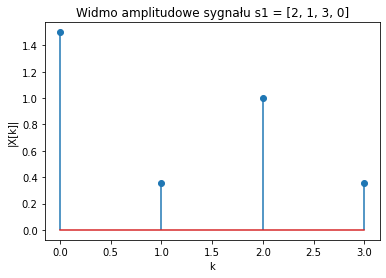

In [13]:
plot_spectrum(abs_s1_fft, 'amplitudowe', 's1', s1)

In [14]:
abs_s2_fft = np.abs(s2_fft)

In [15]:
abs_s2_fft # Widmo amplitudowe s2

array([1.        , 0.79056942, 0.5       , 0.79056942])

In [ ]:
plot_spectrum(abs_s2_fft, 'amplitudowe', 's2', s2)

$$ \text{Widmo fazowe:  } \arg X[k]  $$

In [ ]:
arg_s1_fft = np.angle(s1_fft)

In [ ]:
arg_s1_fft # Widmo fazowe s1

In [ ]:
plot_spectrum(arg_s1_fft, 'fazowe', 's1', s1)

In [ ]:
arg_s2_fft = np.angle(s2_fft)

In [ ]:
arg_s2_fft # Widmo fazowe s2

In [ ]:
plot_spectrum(arg_s2_fft, 'fazowe', 's2', s2)

$$ \text {Twierdzenie Parsevala:  } \sum_{n=0}^{N-1} \lvert x[n] \rvert^2 = \frac {1}{N} \sum_{k=0}^{N-1} \lvert X[k] \rvert ^2$$

In [ ]:
power_s1 = np.sum([np.abs(x)**2 for x in np.fft.ifft(s1)])

In [ ]:
power_s1 # Moc sygnału s1 obliczona przy pomocy odwrotnej transformaty Fouriera

In [ ]:
power_s2 = np.sum([np.abs(x)**2 for x in np.fft.ifft(s2)])

In [ ]:
power_s2 # Moc sygnału s2 obliczona przy pomocy odwrotnej transformaty Fouriera

In [ ]:
power_s1_2 = np.sum([np.abs(x)**2 for x in s1_fft])

In [ ]:
power_s1_2 # Moc sygnału s1 obliczona przy pomocy DFT

In [ ]:
power_s2_2 = np.sum([np.abs(x)**2 for x in s2_fft])

In [ ]:
power_s2_2 # Moc sygnału s2 obliczona przy pomocy DFT

$\mathbf{\text{Wnioski}}$<br>
Zarówno dla sygnału $s_1$, jak i $s_2$, moc sygnału obliczona przy pomocy odwrotnej transformaty Fouriera jest równa mocy sygnału obliczonej przy pomocy DFT, co dowodzi prawdziwości twierdzenia Parsevala.

$$ \text {Splot:  } x[n] \oplus y[n] = \sum_{m=0}^{N-1}x[m]y[(n-m)_N]$$

##### Obliczenie ręczne splotu kołowego:

$$ s_1[0] \oplus s_2[0] = s_1[0]s_2[0] + s_1[1]s_2[3] + s_1[2]s_2[2] + s_1[3]s_2[1] = 2\cdot0 + 1\cdot0 + 3\cdot3 + 0\cdot1 = 9$$

$$ s_1[1] \oplus s_2[1] = s_1[0]s_2[1] + s_1[1]s_2[0] + s_1[2]s_2[3] + s_1[3]s_2[2] = 2\cdot1  +  1\cdot0 + 3\cdot0 + 0\cdot3 = 2$$

$$ s_1[2] \oplus s_2[2] = s_1[0]s_2[2] + s_1[1]s_2[1] + s_1[2]s_2[0] + s_1[3]s_2[3] = 2\cdot3 + 1\cdot1 + 3\cdot0 + 0\cdot0 = 7$$

$$ s_1[3] \oplus s_2[3] = s_1[0]s_2[3] + s_1[1]s_2[2] + s_1[2]s_2[1] + s_1[3]s_2[0] = 2\cdot0 + 1\cdot3 + 3\cdot1 + 0\cdot0 = 6$$

##### Obliczenie splotu kołowego pętlą:

In [ ]:
convolution_1 = []
for n in range(4):
    convolution_1.append(np.sum([s1[m]*s2[n-m] for m in range(4)]))

In [ ]:
convolution_1

##### Obliczenie splotu kołowego za pomocą DFT:

In [ ]:
convolution_2 = np.fft.ifft((s1_fft*N) * (s2_fft*N))

In [ ]:
convolution_2

***
$\mathbf{\text{Zadanie 2}}$<br>
***
Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego sygnału harmonicznego <br>
$s[n]=A\cos\displaystyle \Bigg(2\pi\frac{n}{N}\displaystyle \Bigg)$ o amplitudzie $A=3$ i okresie podstawowym $N=76$. W tym celu dla każdej wartości $n_0 \in \displaystyle \Bigg \{0,\frac{N}{4},\frac{N}{2},\frac{3N}{4}\displaystyle \Bigg\}$ wykreślić widmo amplitudowe i fazowe przesuniętego sygnału $s[n-n_0]$. Skomentować wyniki.

In [ ]:
A = 3
N = 76
n = np.arange(N)

In [ ]:
def s(A, N, n):
    return A*np.cos(2*np.pi*(n/N))

In [ ]:
n_0 = [0, N/4, N/2, 3*N/4]

In [ ]:
"""
Funkcja odszumia transformatę Fouriera
"""
def filter_fft(s_fft, epsilon=1e-6):
    filtered_fft = []
    for fft in s_fft:
        filtered_fft.append(fft) if np.abs(fft) > epsilon else filtered_fft.append(0)
        
    return filtered_fft

In [ ]:
abs_signals_fft = []
arg_signals_fft = []

# Dla każdej wartości przesunięcia czasowego obliczam widmo amplitudowe i fazowe
for n0 in n_0:
    signal = [s(A, N, x-n0) for x in n]
    s_fft = filter_fft(np.fft.fft(signal) / N)
    abs_s_fft = np.abs(s_fft)
    arg_s_fft = filter_fft(np.angle(s_fft))
    abs_signals_fft.append(abs_s_fft)
    arg_signals_fft.append(arg_s_fft)

#### Dla $n_0 = 0$:

$s[n]=3\cos(2\pi\frac{n}{76}) = 3\cos(\frac{\pi n}{38})$

In [ ]:
plt.plot(n, A*np.cos(2*np.pi*((n-n_0[0])/N)))
plt.title('Wykres sygnału s[n-n0]')

In [ ]:
plot_spectrum(abs_signals_fft[0], 'amplitudowe', 's[n-0]')

In [ ]:
plot_spectrum(arg_signals_fft[0], 'fazowe', 's[n-0]')

#### Dla $n_0 = 19$:

$s[n]=3\cos(2\pi\frac{n-19}{76}) = 3\cos(\frac{\pi n}{38} - \frac{\pi}{2}) = 3\cos(\frac{\pi}{2}-\frac{\pi n}{38}) = 3\sin(\frac{\pi n}{38})$

In [ ]:
plt.plot(n, A*np.cos(2*np.pi*((n-n_0[1])/N)))
plt.title('Wykres sygnału s[n-n0]')

In [ ]:
plot_spectrum(abs_signals_fft[1], 'amplitudowe', 's[n-19]')

In [ ]:
plot_spectrum(arg_signals_fft[1], 'fazowe', 's[n-19]')

#### Dla $n_0 = 38$:

$s[n]=3\cos(2\pi\frac{n-38}{76}) = 3\cos(\frac{\pi n}{38} - \pi) = 3\cos(\pi-\frac{\pi n}{38})=-3\cos(\frac{\pi n}{38})$

In [ ]:
plt.plot(n, A*np.cos(2*np.pi*((n-n_0[2])/N)))
plt.title('Wykres sygnału s[n-n0]')

In [ ]:
plot_spectrum(abs_signals_fft[2], 'amplitudowe', 's[n-38]')

In [ ]:
plot_spectrum(arg_signals_fft[2], 'fazowe', 's[n-38]')

#### Dla $n_0 = 57$:

$s[n]=3\cos(2\pi\frac{n-57}{76}) = 3\cos(\frac{\pi n}{38} - \frac{3\pi}{2})=3\cos(\frac{\pi n}{38} - \pi - \frac{\pi}{2})=-3\cos(\frac{\pi}{2}-\frac{\pi n}{38})=-3\sin(\frac{\pi n}{38})$

In [ ]:
plt.plot(n, A*np.cos(2*np.pi*((n-n_0[3])/N)))
plt.title('Wykres sygnału s[n-n0]')

In [ ]:
plot_spectrum(abs_signals_fft[3], 'amplitudowe', 's[n-57]')

In [ ]:
plot_spectrum(arg_signals_fft[3], 'fazowe', 's[n-57]')

$\mathbf{\text{Wnioski}}$<br><br>
Widmo amplitudowe dla każdego sygnału jest takie same, wynika to z faktu, że przy przesunięciu w czasie część rzeczywista widma pozostaje niezmienna. Na każdym wykresie widma amplitudowego obserwujemy dwa prążki, gdyż sygnał poddawany transformacji Fouriera jest rzeczywisty, a wtedy zawsze otrzymamy dwie kopie widma. Druga kopia jest zespolonym sprzężeniem pierwszej. Każda wartość prążka obserwowanego w widmie amplitudowym jest równa $\frac{A}{2}$, ponieważ moc rozkłada się równo na oba prążki.<br>
Widmo fazowe natomiast w każdym z kolejnych przypadków zmienia wartość o $\frac{\pi}{2}$, gdyż w wyniku operacji przesunięcia sygnału w czasie zmieniona zostaje część urojona widma, czyli faza. Każda wartość widma fazowego odpowiada mierze kąta stałego w trygonometrycznych wzorach redukcyjnych, które wyprowadziłem powyżej. Na podstawie wykresów sygnałów pokazałem również, że sygnały wyprowadzone ze wzorów redukcyjnych faktycznie odpowiadają sygnałom po odpowiednich przesunięciach czasowych.

***
$\mathbf{\text{Zadanie 3}}$<br>
***
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału $s[n]=A\frac{n\mod N}{N}$ o amplitudzie $A=1$ i okresie podstawowym $N=17$. W tym celu dla każdej wartości $N_0 \in \{0,1N,4N,9N\}$ wykreślić widmo amplitudowe i fazowe sygnału $s[n]$ dopełnionego $N_0$ zerami. Skomentować otrzymane wyniki.

In [ ]:
A = 1
N = 17
N_0 = [0, N, 4*N, 9*N]
n = np.arange(N)

In [ ]:
def s(A, N, n):
    return A*((n % N) / N)

In [ ]:
abs_signals_fft = []
arg_signals_fft = []

# Dla każdej wartości N_0 obliczam widmo amplitudowe i fazowe sygnału s[n] dopełnionego zerami
for N0 in N_0:
    signal = [s(A, N, x) for x in n]
    signal.extend([0] * N0)
    s_fft = filter_fft(np.fft.fft(signal) / (N + N0))
    abs_s_fft = np.abs(s_fft)
    arg_s_fft = np.angle(s_fft)
    abs_signals_fft.append(abs_s_fft)
    arg_signals_fft.append(arg_s_fft)

#### Dla $N_0 = 0$:

In [ ]:
plot_spectrum(abs_signals_fft[0], 'amplitudowe', 's[n]', x=np.arange(N))

In [ ]:
plot_spectrum(arg_signals_fft[0], 'fazowe', 's[n]', x=np.arange(N))

#### Dla $N_0 = 17$:

In [ ]:
plot_spectrum(abs_signals_fft[1], 'amplitudowe', 's[n] dopelniony 17 zerami', x=np.arange(N+N_0[1]))

In [ ]:
plot_spectrum(arg_signals_fft[1], 'fazowe', 's[n] dopelniony 17 zerami', x=np.arange(N+N_0[1]))

#### Dla $N_0 = 68$:

In [ ]:
plot_spectrum(abs_signals_fft[2], 'amplitudowe', 's[n] dopelniony 68 zerami', x=np.arange(N+N_0[2]))

In [ ]:
plot_spectrum(arg_signals_fft[2], 'fazowe', 's[n] dopelniony 68 zerami', x=np.arange(N+N_0[2]))

#### Dla $N_0 = 153$:

In [ ]:
plot_spectrum(abs_signals_fft[3], 'amplitudowe', 's[n] dopelniony 153 zerami', x=np.arange(N+N_0[3]))

In [ ]:
plot_spectrum(arg_signals_fft[3], 'fazowe', 's[n] dopelniony 153 zerami', x=np.arange(N+N_0[3]))

$\mathbf{\text{Wnioski}}$<br><br>
Uzupełnienie zerami jest jedną z metod poprawy rozdzielczości częstotliwościowej DFT. Dodanie próbek o wartościach zerowych ma na celu zwiększenie całkowitej liczby próbek danych wejściowych, tym samym zmniejszając krok próbkowania widma. Im więcej jest punktów w DFT, tym lepiej wartości wyjściowe tej DFT aproksymują transformatę. Można to zauważyć na kolejnych wykresach widm amplitudowych, jak i fazowych, gdzie wraz ze wzrostem liczby próbek zerowych, krok próbkowania widma maleje, a okres wzrasta - uciąglanie widma prążkowego. Zauważyć można, że łączna wartość prążków w widmie amplitudowym w każdym przypadku jest taka sama, z czego wnioskować można, że dopełnianie sygnału zerami nie wpływa na moc sygnału.

***
$\mathbf{\text{Zadanie 4}}$<br>
***
Dany jest sygnał rzeczywisty $s(t)=A_1\sin(2\pi f_1t) + A_2\sin(2\pi f_2t) + A_3\sin(2\pi f_3t)$, gdzie $A_1=0.2, f_1=2000 Hz, A_2=0.5, f_2=6000 Hz, A_3 = 0.6, f_3=10000 Hz$. Przy założeniu, że częstotliwość próbkowania wynosi $f_s=48000 Hz$, a liczba próbek sygnału wynosi $N_1=2048$, przedstawić wykres widmowej gęstości mocy sygnału $s(t)$. Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek $N_2=\frac{3}{2}N_1$? Odpowiedź uzasadnić.

In [ ]:
A_1 = 0.2
f_1 = 2000
A_2 = 0.5
f_2 = 6000
A_3 = 0.6
f_3 = 10000
f_s = 48000
N_1 = 2048
N_2 = int(3/2 * N_1)
T_s = 1/f_s

In [ ]:
def s(t):
    return A_1*np.sin(2*np.pi*f_1*t) + A_2*np.sin(2*np.pi*f_2*t) + A_3*np.sin(2*np.pi*f_3*t)

#### Dla $N_1=2048$:

In [ ]:
T_1 = np.arange(N_1)*T_s

In [ ]:
signal_1 = np.array([s(t) for t in T_1])

In [ ]:
s_1_rfft = np.fft.rfft(signal_1) / (N_1/2)

In [ ]:
freq_1 = np.fft.rfftfreq(N_1, T_s)

In [ ]:
spectrum_1 = np.abs(s_1_rfft)

In [ ]:
plt.stem(freq_1, spectrum_1)
plt.title('Widmo gęstości mocy sygnału s(t) próbkowanego 2048 próbkami')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('moc widma')

#### Dla $N_2=3072$:

In [ ]:
T_2 = np.arange(N_2)*T_s

In [ ]:
signal_2 = np.array([s(t) for t in T_2])

In [ ]:
s_2_rfft = np.fft.rfft(signal_2) / (N_2/2)

In [ ]:
freq_2 = np.fft.rfftfreq(N_2, T_s)

In [ ]:
spectrum_2 = np.abs(s_2_rfft)

In [ ]:
plt.stem(freq_2, spectrum_2)
plt.title('Widmo gęstości mocy sygnału s(t) próbkowanego 3072 próbkami')
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('moc widma')

$\mathbf{\text{Wnioski}}$<br><br>
DFT daje prawidłowe wyniki tylko wtedy, kiedy ciąg danych wejściowych zawiera energię rozłożoną dokładnie przy częstotliwościach, dla których dokonujemy analizy, określonych równaniem $f_m=\frac{mf_s}{N}, m=0,1,...,N-1$, bedących całkowitymi wielokrotnościami częstotliwości podstawowej $\frac{f_s}{N}$. Dlatego, jeśli sygnał wejściowy zawiera składową o pewnej częstotliwości pośredniej, dla której $f_m=\frac{mf_s}{N}$ nie jest liczbą całkowitą, wystąpi przeciek widma.<br>

###### W przypadku $N_1=2048$:

In [ ]:
m1 = f_1 * N_1 / f_s

In [ ]:
m1 # Iloraz nie jest liczbą całkowitą - wystąpi przeciek widma

In [ ]:
m2 = f_2 * N_1 / f_s

In [ ]:
m2

In [ ]:
m3 = f_3 * N_1 / f_s

In [ ]:
m3 # Iloraz nie jest liczbą całkowitą - wystąpi przeciek widma

Dlatego też na pierwszym wykresie przy częstotliwościach $f_1=2000Hz$ oraz $f_3=10000Hz$ widzimy przeciek widma - energia wejściowa przecieka do innych próbek DFT, w widmie sygnału zdyskretyzowanego pojawiają się składowe nie występujące w widmie sygnału analogowego. Dlatego też moc największego prążka na tych częstotliwościach nie jest równa amplitudom, a jest mniejsza.

###### W przypadku $N_2=3072$:

In [ ]:
m1 = f_1 * N_2 / f_s

In [ ]:
m1

In [ ]:
m2 = f_2 * N_2 / f_s

In [ ]:
m2

In [ ]:
m3 = f_3 * N_2 / f_s

In [ ]:
m3

Przy liczbie próbek $N_2=3072$ ciąg danych wejściowych zawiera energię rozłożoną dokładnie przy częstotliwościach, dla których dokonujemy analizy - dla każdego $f_m=\frac{mf_s}{N}$ iloraz jest liczbą całkowitą. Dlatego też przeciek widma w tym przypadku nie występuje, a moce widma osiągane na odpowiednich częstotliwościach równe są amplitudom - co można zauważyć na drugim wykresie widma mocy.<br>
Prążki położone są w punktach odpowiadających częstotliwościom składowych harmonicznych sygnału okresowego.